In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


## Plot 1: Popularity vs speechiness and loudness.

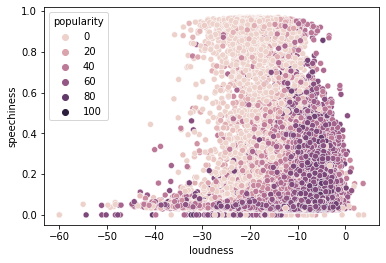

In [3]:
sns.scatterplot(x='loudness', y='speechiness', hue= "popularity", data=df)
plt.show()

## Plot 2: Beats per minute compared to energy of all the songs and popularity.

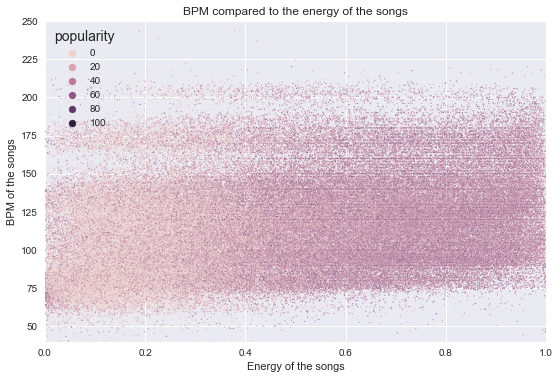

In [14]:
energy_songs = df.energy
tempo_songs = df.tempo


sns.scatterplot(x = energy_songs, y = tempo_songs, hue=df.popularity, alpha=.75, c='#1f77b4', s=1.5, vmin=1)
plt.xlabel("Energy of the songs")
plt.ylabel("BPM of the songs")
plt.ylim(ymin=40, ymax=250)
plt.xlim(xmin=0, xmax=1)
plt.title("BPM compared to the energy of the songs")
plt.show()

## Plot 3: Distribution of the BPM's of the songs.

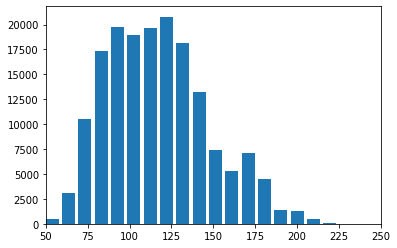

In [5]:
tempo_songs = df.tempo
#print(tempo_songs.head(10))
#print(tempo_songs.min(), tempo_songs.max())
num_bins = 25
plt.hist(tempo_songs, num_bins, rwidth=0.8)
plt.xlim(xmin=50, xmax=250)
plt.grid(False)
plt.show()

## Plot 4: Histogram of sum of all the songs per decade. 

0         1928
1         1928
2         1928
3         1928
4         1928
          ... 
169904    2020
169905    2020
169906    2020
169907    2020
169908    2020
Name: year, Length: 169909, dtype: int64


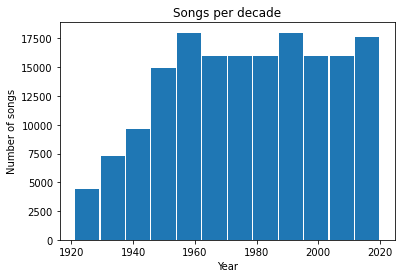

In [6]:
songs_per_year = df.year
print(songs_per_year)
num_bins = 12
array_decades = np.arange(1920, 2021, 10)

plt.hist(songs_per_year,num_bins,rwidth=.95)
plt.title("Songs per decade")
plt.ylabel("Number of songs")
plt.xlabel("Year")
plt.show()



## Plot 5: 

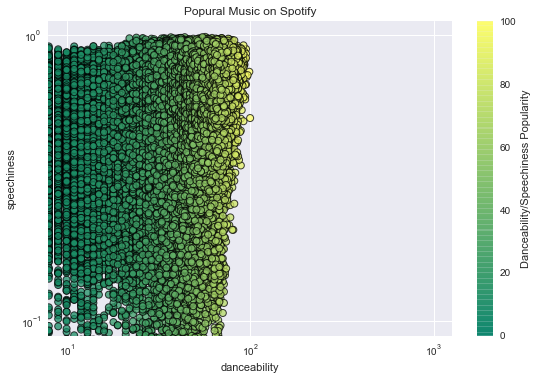

In [7]:
plt.style.use('fivethirtyeight')

plt.style.use('seaborn')

data = pd.read_csv('data.csv')
popularity = data['popularity'] 
danceability = data['danceability']
speechiness = data['speechiness']

plt.scatter(popularity, danceability, c=popularity, cmap='summer', 
            edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Danceability/Speechiness Popularity')

plt.xscale('log')
plt.yscale('log')

plt.title('Popural Music on Spotify')
plt.xlabel('danceability')
plt.ylabel('speechiness')

plt.tight_layout()

## Plot 6: The total songs per key

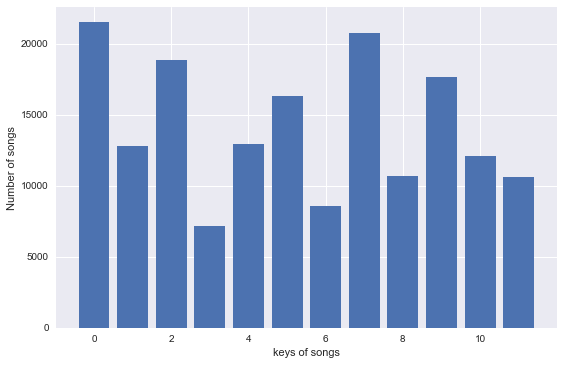

In [8]:
danceability = df.danceability
songs_key = df.key.value_counts().sort_index()
range_keys = np.arange(0,12,1)

# fig = plt.figure()
# ax = fig.add_axes([range(0,12)])
# ax.bar(range_keys,songs_key)
# plt.show()

plt.bar(range_keys, songs_key)
plt.xlabel("keys of songs")
plt.ylabel("Number of songs")
#plt.set_xticklabels(['A','Bm','B','C','C#','D','Em','E','F','F#','G','Am'])
plt.show()